# Prediction of Diabetes using Random Forest Classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [2]:
data = pd.read_csv("pima-data.csv")

In [3]:
data.shape

(768, 9)

In [5]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#check if any null value is present
data.isnull().values.any()


False

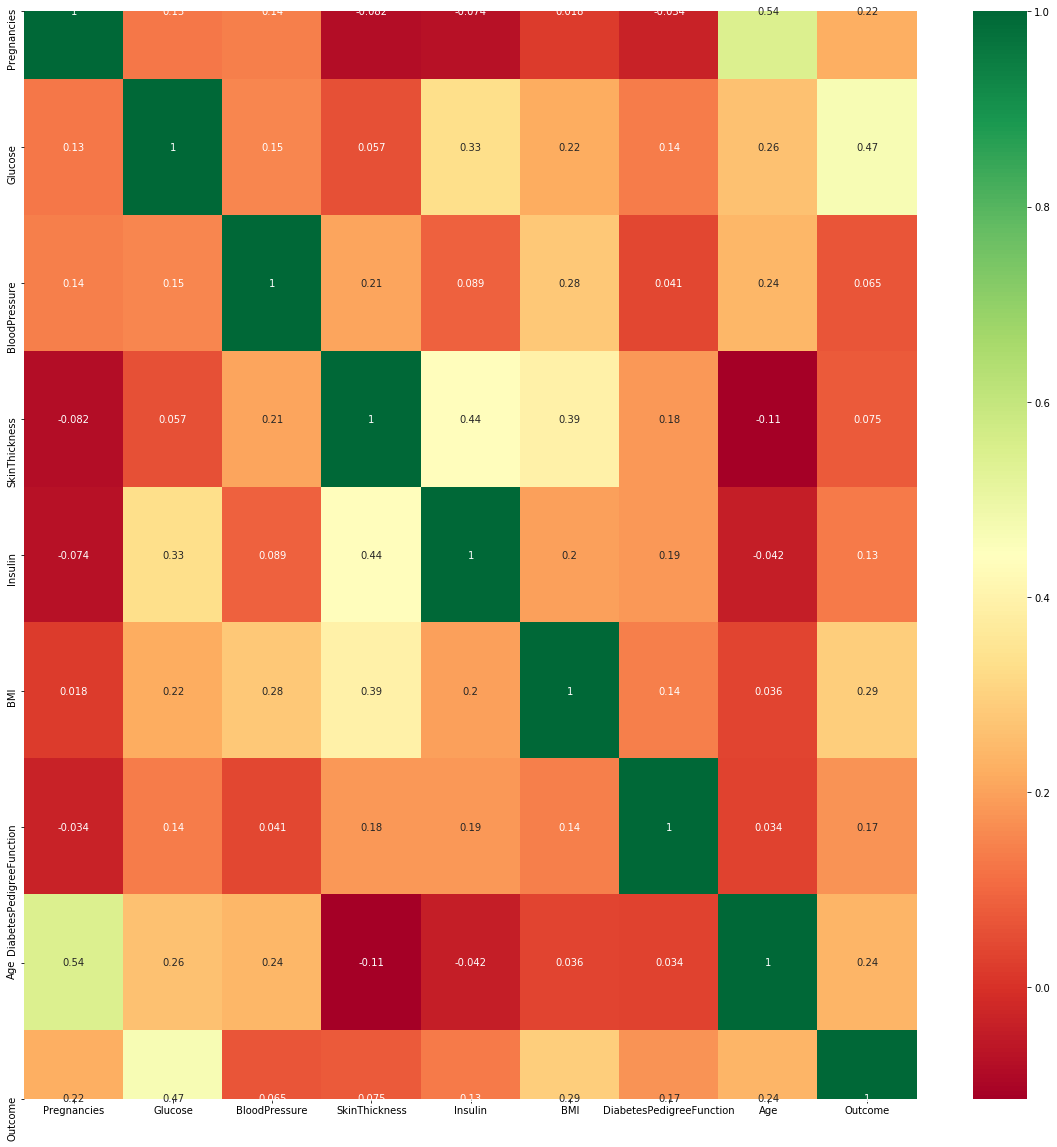

In [7]:
 
#correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlation of each feature in dataset
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot head map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")



In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
diabetes_map={True: 1,False: 0}

In [10]:
data['Outcome']=data['Outcome'].map(diabetes_map)

In [11]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetes_true_count=len(data.loc[data['Outcome']==True])
diabetes_false_count=len(data.loc[data['Outcome']==False])


In [13]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [14]:
#Train,test split
from sklearn.model_selection import train_test_split
feature_columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class=['Outcome']


In [15]:
x=data[feature_columns].values
y=data[predicted_class].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)


# Check how many other missing (zero) values

In [16]:
print("total number of rows:{0}".format(len(data)))

total number of rows:768


In [17]:
print("number of rows missing Glucose:{0}".format(len(data.loc[data['Glucose']==0])))
print("number of rows missing BloodPressure:{0}".format(len(data.loc[data['BloodPressure']==0])))
print("number of rows missing SkinThickness:{0}".format(len(data.loc[data['SkinThickness']==0])))
print("number of rows missing Insulin:{0}".format(len(data.loc[data['Insulin']==0])))
print("number of rows missing BMI:{0}".format(len(data.loc[data['BMI']==0])))
print("number of rows missing DiabetesPedigreeFunction:{0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("number of rows missing Age:{0}".format(len(data.loc[data['Age']==0])))


number of rows missing Glucose:5
number of rows missing BloodPressure:35
number of rows missing SkinThickness:227
number of rows missing Insulin:374
number of rows missing BMI:11
number of rows missing DiabetesPedigreeFunction:0
number of rows missing Age:0


In [18]:
 
from sklearn.preprocessing import Imputer
fill_values=Imputer(missing_values=0,strategy="mean",axis=0)
x_train=fill_values.fit_transform(x_train)
x_test=fill_values.fit_transform(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(random_state=10)
random_forest_model.fit(x_train,y_train.ravel())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [20]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [21]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost


In [22]:
classifier=xgboost.XGBClassifier()

In [23]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [24]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [29]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y.ravel())
timer(start_time) 


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



 Time taken: 0 hours 0 minutes and 2.93 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.7s finished


In [30]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y.ravel(),cv=10)


In [34]:
score

array([0.7012987 , 0.76623377, 0.75324675, 0.66233766, 0.67532468,
       0.75324675, 0.76623377, 0.79220779, 0.76315789, 0.77631579])

In [35]:
score.mean()

0.7409603554340397